In [1]:
#import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

os.getcwd()
folder_in = "../data_CROUS/data_processed/merged_one_hot/"
folder_out = ""

In [2]:
#chargement des données
dfmerged = pd.read_csv(folder_in + "merged_Forms_Choix.csv", sep=',', encoding='latin-1')
#dfchoix = pd.read_csv(folder_in + "Merged_Choix.csv", sep=',', encoding='latin-1')
dfmerged["Faim"]

0      2
1      2
2      2
3      2
4      2
      ..
321    1
322    3
323    3
324    2
325    2
Name: Faim, Length: 326, dtype: int64

In [3]:
#pour une ligne donnée, récupération des numéros de formulaires des amis dans le merged


#on créé un dataframe empty 
YX = pd.DataFrame(columns=dfmerged.columns)

for i in range(len(dfmerged)):
    #on prend la ieme ligne du merged
    ligne = dfmerged.iloc[i]
    num_form = ligne['Unnamed: 0']
    num_groupe = i+1
    Lamis = []
    yx = dfmerged[dfmerged['index'] == num_form]
    #on récupère les valeurs des colonnes dont le nom commencent par Ami
    for col in ligne.index:
        if col.startswith('Ami'):
            #on ne prend que les valeurs différentes de nan
            if type(ligne[col]) is str:
                Lamis.append(ligne[col])
    #on crée une matrice de choix concaténée avec les choix des amis 
    #comme on a moins de ligne dans le merged que dans le choix, on part du merged et ajoute les choix des amis
    for ami in Lamis:
        # on prend la ligne où le num_form est celui de l'ami
        choix_ami = dfmerged[dfmerged['index'] == ami]
        #soit on a une ligne pleine car le numero de formulaire a été trouvé
        #soit une ligne vide car il n'a pas été retrouvé
        #DANS LE CAS OÙ IL N'EST PAS TROUVÉ ON AJOUTE PAS LA LIGNE
        if choix_ami.shape[0] != 0:
            yx = pd.concat([yx, choix_ami], axis=0)
        yx['num_groupe'] = num_groupe
    #on ajoute la ligne au dataframe YX
    YX = pd.concat([YX, yx], axis=0)



YX.drop(['Unnamed: 0'], axis=1, inplace=True)



In [4]:
#separation des donnees selon le jour de la semaine (si il y a plusieurs jours)
YX

,index,Genre,Age,Taille,Poids,IMC,Activité physique,Régime particulier,Végé,Fréquence CROUS,...,poire,pruneauxausirop,emmental,bleudauvergneaop,cremepraline,gateaudesemoule,cocktailfruitsexotiques,roquefort,cantalaop,num_groupe
243,7F8H,1,19,1.82,65.0,19.623234,2,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,0R4C,1,19,1.87,67.0,19.159827,3,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
219,6O4Y,1,19,1.85,74.0,21.621622,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25,0S0Q,1,19,1.78,55.0,17.358919,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
96,2U4F,1,20,1.7,65.0,22.491349,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,3S5G,0,21,1.63,55.0,20.700817,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325.0
33,1A9V,1,21,1.74,65.0,21.46915,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325.0
206,6A4U,1,22,1.75,50.0,16.326531,2,0,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325.0
303,9C8Y,1,22,1.78,78.0,24.618104,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,325.0


In [5]:
# definition d'une distance entre plateau
# on prend en entrée deux lignes 2 choix numpy

# si on utilise ça, la distance des plateaux est favorisé par le fait de prendre beaucoup d'items
def distance_plateau(p1,p2):
    dist = np.sum(np.abs(p1 - p2))
    return dist


In [6]:
# alors que si on utilise ça, on rapporte au nombre d'items choisi donc c'est ok 
def distance_plateau(p1,p2):
    nb_items1 = np.sum(p1)
    nb_items2 = np.sum(p2)
    nb_item_commun = np.sum(p1*p2)
    similarity = 2*nb_item_commun/(nb_items1 + nb_items2)
    return similarity*100

_____________________________________________________________________

#### calcul de la distance moyenne entre 2 plateaux 

In [7]:
somme = 0
i = 0
list_dist = []
nYX = dfmerged.to_numpy()
for plateau1 in nYX:
    for plateau2 in nYX:
        if plateau1[1] != plateau2[1]:
            i += 1 
            somme += distance_plateau(plateau1[41:118],plateau2[41:118])
            list_dist.append(distance_plateau(plateau1[41:118],plateau2[41:118]))
            #print(plateau1[41:118])
moyenne = somme / i     
ecartT = np.std(list_dist)      
  
    

In [8]:
print(moyenne, i, ecartT)
#intervalle de confiance à 95%
print(moyenne - 1.96*ecartT/np.sqrt(325), moyenne + 1.96*ecartT/np.sqrt(325))

12.97640832242121 105950 20.270176458463602
10.772609634051374 15.180207010791047


#### calcul de la distance moyenne entre 2 plateaux à l'interieur des groupes 

In [9]:
nYXgroup = YX.to_numpy()


In [84]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        for plateau2 in nYXsubg:
            if plateau1[0] != plateau2[0]:
                
                iGr += 1 
                sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                #print(plateau1[40:118])
    
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)


moyennegroup = somme / i 
ecartT = np.std(list_dist) 


In [85]:
print(moyennegroup, i, np.std(list_dist))
print(moyennegroup - 1.96*ecartT/np.sqrt(i), moyennegroup + 1.96*ecartT/np.sqrt(i))

50.43275012025013 160 19.713605936142123
47.3780952332421 53.487405007258154


_____________________________________________________________________

#### calcul de distance à l'interieur des groupes selon une modalité (faim, stress, genre...)

a/...selon le genre 

In [89]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[1] == 0: #seulement si le genre est homme ou si le genre est femme 
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyenneGenre = somme / i 
ecartT = np.std(list_dist)   


In [90]:
print(moyenneGenre, i, np.std(list_dist))
#print(moyenneGenre - 1.96*ecartT/np.sqrt(i), moyenneGenre + 1.96*ecartT/np.sqrt(i))

42.20864024363658 76 20.367051966758247


...on observe que les femmes ont des plateaux qui ont une distance plus petite avec les plateaux de leur groupe que les hommes (plus d'influence sociale chez la femme ?)

b/ Maintenant pour les IMC

In [93]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[5] > 25: #seulement si le genre est homme
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyenneIMC = somme / i 
ecartT = np.std(list_dist)   


In [94]:
print(moyenneIMC, i, np.std(list_dist))
#print(moyenneIMC - 1.96*ecartT/np.sqrt(i), moyenneIMC + 1.96*ecartT/np.sqrt(i))

53.466619659801474 44 22.092775440356153


...IMC élevé favorise des distances petites entre plateaux 
(plus de similarité)

c/ Maintenant pour l'activité physique 

In [97]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[6] <= 1.5: 
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyenneaactiphys = somme / i  
ecartT = np.std(list_dist)  


In [98]:
print(moyenneaactiphys, i, np.std(list_dist))
#print(moyenneaactiphys - 1.96*ecartT/np.sqrt(i), moyenneaactiphys + 1.96*ecartT/np.sqrt(i))

50.45336238770584 132 19.748562736808005


pas de difference...

d/ maintenant pour la faim

In [106]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[19] < 2.5: 
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyennefaim = somme / i   
ecartT = np.std(list_dist) 


In [107]:
print(moyennefaim, i, np.std(list_dist))
#print(moyennefaim - 1.96*ecartT/np.sqrt(i), moyennefaim + 1.96*ecartT/np.sqrt(i))

51.183882339211124 147 19.407157439933545


Les gens qui ont faim sont legerement moins influençable

e/ gens stressés

In [110]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[20] < 2.5: 
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyennestress = somme / i   
ecartT = np.std(list_dist) 


In [111]:
print(moyennestress, i, np.std(list_dist))
#print(moyennestress - 1.96*ecartT/np.sqrt(i), moyennestress + 1.96*ecartT/np.sqrt(i))

50.65940478253593 160 19.64581406193699


Les gens stressés ont des plateaux vraiment différents des autres !!?? 

6/ Enfin pour l'influence sociale

In [124]:
i = 0
somme = 0
list_dist = []
for num_groupe in range(1,327):
    #nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    nYXsubg = nYXgroup[nYXgroup[:,-1] == num_groupe]
    #print(nYXsubg)
    sommeGr = 0
    iGr = 0
    for plateau1 in nYXsubg:
        if plateau1[16] > 2.5: 
            for plateau2 in nYXsubg:
                if plateau1[0] != plateau2[0]:
                    
                    iGr += 1 
                    sommeGr += distance_plateau(plateau1[40:118],plateau2[40:118])
                    #print(plateau1[40:118])
        
    if iGr != 0:
        moyenneGr = sommeGr / iGr
        i +=1
        somme+= moyenneGr
        list_dist.append(moyenneGr)

moyenneinflusociale = somme / i   
ecartT = np.std(list_dist) 


In [125]:
print(moyenneinflusociale, i, np.std(list_dist))
#print(moyenneinflusociale - 1.96*ecartT/np.sqrt(i), moyenneinflusociale + 1.96*ecartT/np.sqrt(i))

39.22902494331066 14 16.155965302447672


______________________________________

creation de graphes 


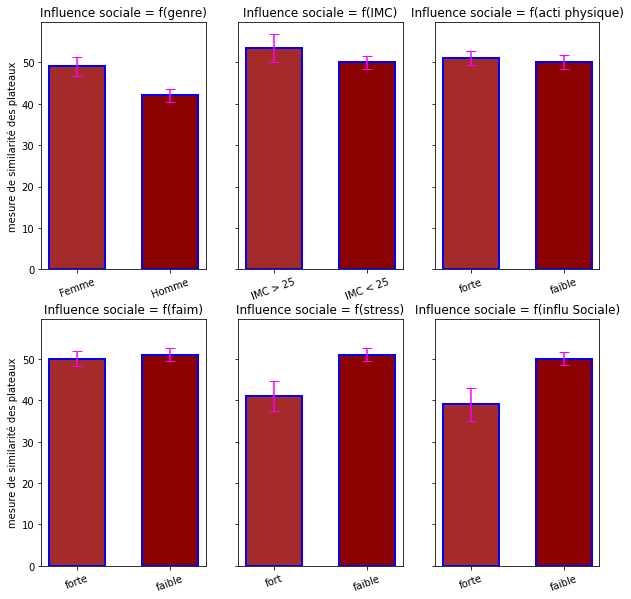

In [137]:
moyenneH = 42
moyenneF = 49
ecartH = 20
ecartF = 21
NH = 76
NF = 157

moyenneIMCh = 53.5
moyenneIMCl = 50
ecartIMCh = 22
ecartIMCl= 20
NIMCh = 44
NIMCl = 159

moyennephysh = 51
moyennephysl = 50
ecartphysh = 20
ecartphysl = 20
Nphysh = 143
Nphysl = 132

moyennefaimh = 50
moyennefaiml = 51
ecartfaimh = 20
ecartfaiml= 19
Nfaimh = 119
Nfaiml = 147

moyennestressh = 41
moyennestressl = 51
ecartstressh = 20
ecartstressl = 20
Nstressh = 30
Nstressl = 160

moyenneinfluSh = 39
moyenneinfluSl = 50
ecartinfluSh = 15
ecartinfluSl= 20
NinfluSh = 14
NinfluSl = 157

#création d'un graphique avec plusieurs sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(10,10), sharey=True)

axs[0,0].bar(range(2), [moyenneF, moyenneH], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartH/np.sqrt(NH), ecartH/np.sqrt(NF)],
  ecolor = 'magenta', capsize = 5)
axs[0,0].set_title("Influence sociale = f(genre)")
axs[0,0].set_ylabel("mesure de similarité des plateaux")
axs[0,0].set_xticks(range(2), ['Femme', 'Homme'],rotation = 20)

axs[0,1].bar(range(2), [moyenneIMCh, moyenneIMCl], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartIMCh/np.sqrt(NIMCh), ecartIMCl/np.sqrt(NIMCl)],
  ecolor = 'magenta', capsize = 5)
axs[0,1].set_title("Influence sociale = f(IMC)")
axs[0,1].set_xticks(range(2), ['IMC > 25', 'IMC < 25'],rotation = 20)

axs[0,2].bar(range(2), [moyennephysh, moyennephysl], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartphysh/np.sqrt(Nphysh), ecartphysl/np.sqrt(Nphysl)],
  ecolor = 'magenta', capsize = 5)
axs[0,2].set_title("Influence sociale = f(acti physique)")
axs[0,2].set_xticks(range(2), ['forte', 'faible'],rotation = 20)




#fig, axs = plt.subplots(1, 3, figsize=(10,5), sharey=True)

axs[1,0].bar(range(2), [moyennefaimh, moyennefaiml], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartfaimh/np.sqrt(Nfaimh), ecartfaiml/np.sqrt(Nfaiml)],
  ecolor = 'magenta', capsize = 5)
axs[1,0].set_title("Influence sociale = f(faim)")
axs[1,0].set_ylabel("mesure de similarité des plateaux")
axs[1,0].set_xticks(range(2), ['forte', 'faible'],rotation = 20)

axs[1,1].bar(range(2), [moyennestressh, moyennestressl], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartstressh/np.sqrt(Nstressh), ecartstressl/np.sqrt(Nstressl)],
  ecolor = 'magenta', capsize = 5)
axs[1,1].set_title("Influence sociale = f(stress)")
axs[1,1].set_xticks(range(2), ['fort', 'faible'],rotation = 20)

axs[1,2].bar(range(2), [moyenneinfluSh, moyenneinfluSl], width = 0.6, color = ['brown', 'darkred'],
  edgecolor = 'blue', linewidth = 2, yerr = [ecartinfluSh/np.sqrt(NinfluSh), ecartinfluSl/np.sqrt(NinfluSl)],
  ecolor = 'magenta', capsize = 5)
axs[1,2].set_title("Influence sociale = f(influ Sociale)")
axs[1,2].set_xticks(range(2), ['forte', 'faible'],rotation = 20)


Les petits groupes sont-ils plus ou moins influencés que les gros groupes ? 